# Xintong Wu (xw225) STATS 202 HW2

### About more discussion please refer to the open GitHub page: https://github.com/Xintong1122/STATS202HW



###  1. Problem formulation

Question: How can we use students’ demographic, educational, and behavioral data to build predictive models for their final mathematics performance?
Objective:

1. Quantify the relationship between academic performance and explanatory factors (e.g., study time, previous failures, parental support).

2. Identify which factors most strongly correlate with better (or worse) outcomes in mathematics.

3. Build predictive models that can help schools or educators intervene early based on student profile data.

### 2. Data loading and visualization

In [40]:
# !pip install pandas numpy scikit-learn seaborn matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model as lm
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# Load the student dataset from CSV
df = pd.read_csv('https://raw.githubusercontent.com/Xintong1122/STATS202HW/refs/heads/main/Data/students.csv')

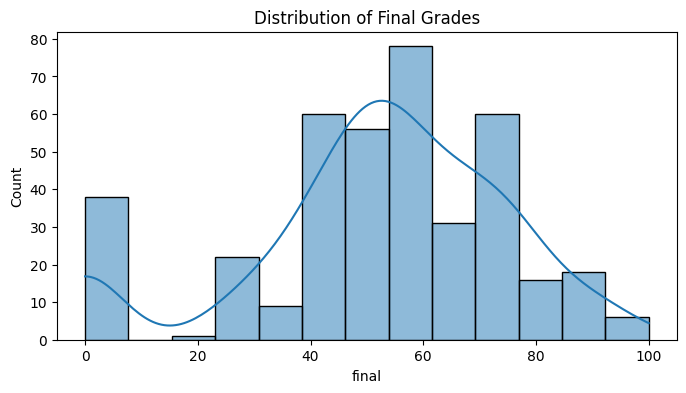

In [42]:
# Plot final grade distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['final'], kde=True)
plt.title('Distribution of Final Grades')
plt.show()

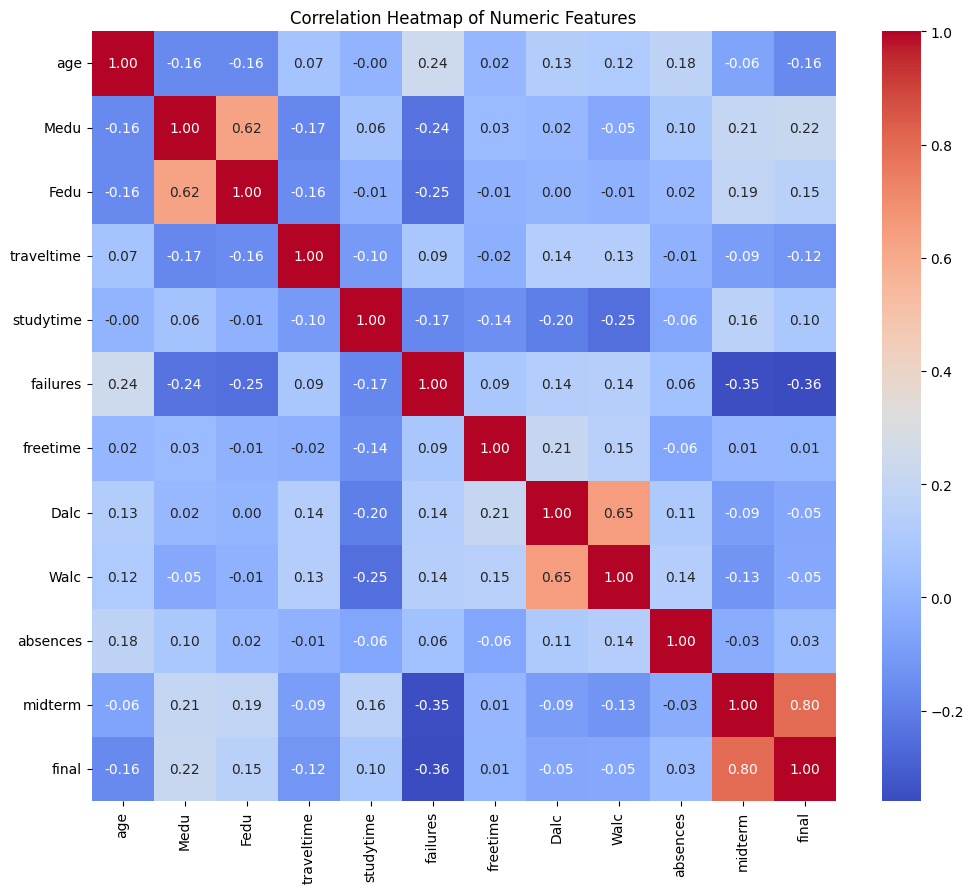

In [43]:
# Plot correlation heat map
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

After data loading, the distribution of final grades is shown by histogram, and it is found that most students' grades are concentrated in 30-80 points.

The heat map shows that midterm grades (midterm) are highly correlated with final grades (correlation coefficient 0.8), followed by parental education level (Medu, Fedu) and studytime (studytime).

### 3. Preprocessing

In [44]:
# Delete missing data from final score (target value cannot be NaN)
df = df.dropna(subset=['final'])

# Encode binary variables using predefined mappings
binary_vars = ['gender', 'famsize', 'schoolsup', 'famsup', 'paid', 'activities', 'higher']
binary_map = {
    'F': 0, 'M': 1,
    'le': 0, 'gt3': 1,
    'no': 0, 'yes': 1
}
for var in binary_vars:
    df[var] = df[var].map(binary_map)

# Apply one-hot encoding to categorical variables
df = pd.get_dummies(df, columns=['Mjob', 'Fjob'], drop_first=True)

# Fill any missing values with 0
df = df.fillna(0)

This step is designed to clean and prepare the dataset for machine learning by handling missing values and converting categorical variables into numerical formats that models can understand.

### 4. Feature engineering

In [45]:
# Combine Medu and Fedu into a new feature 'parent_edu'
df['parent_edu'] = (df['Medu'] + df['Fedu']) / 2
df.drop(['Medu', 'Fedu'], axis=1, inplace=True)

# Separate feature and target variables
X = df.drop(['final'], axis=1)
y = df[['final']]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize features and target using MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

This step enhances data quality through feature consolidation, prepares it for modeling via splitting, and ensures consistency across variables with scaling

### 5. Model building and training

In [46]:
# Train a Linear Regression model
reg = lm.LinearRegression()
reg.fit(X_train_scaled, y_train_scaled)
y_pred_lr = reg.predict(X_test_scaled)

# Train a Ridge Regression model with alpha=1.0
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

### 6. Model selection

In [47]:
# Evaluate model performance using MSE and R^2
mse_lr = mean_squared_error(y_test_scaled, y_pred_lr)
r2_lr = r2_score(y_test_scaled, y_pred_lr)

mse_ridge = mean_squared_error(y_test_scaled, y_pred_ridge)
r2_ridge = r2_score(y_test_scaled, y_pred_ridge)

print("Linear Regression:")
print(f"  MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")

print("Ridge Regression:")
print(f"  MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")

Linear Regression:
  MSE: 0.0199, R²: 0.6110
Ridge Regression:
  MSE: 0.0191, R²: 0.6276


In [48]:
# Choose model
if r2_ridge > r2_lr:
    print("Final model selected: Ridge Regression (better R² score)")
    final_model = ridge
    final_pred = y_pred_ridge
else:
    print("Final model selected: Linear Regression")
    final_model = reg
    final_pred = y_pred_lr

Final model selected: Ridge Regression (better R² score)


We choose the model which has higher R^2 and lower MSE. Here, Ridge Regression model is better than Linear Regression model.

### 7. Final model evaluation

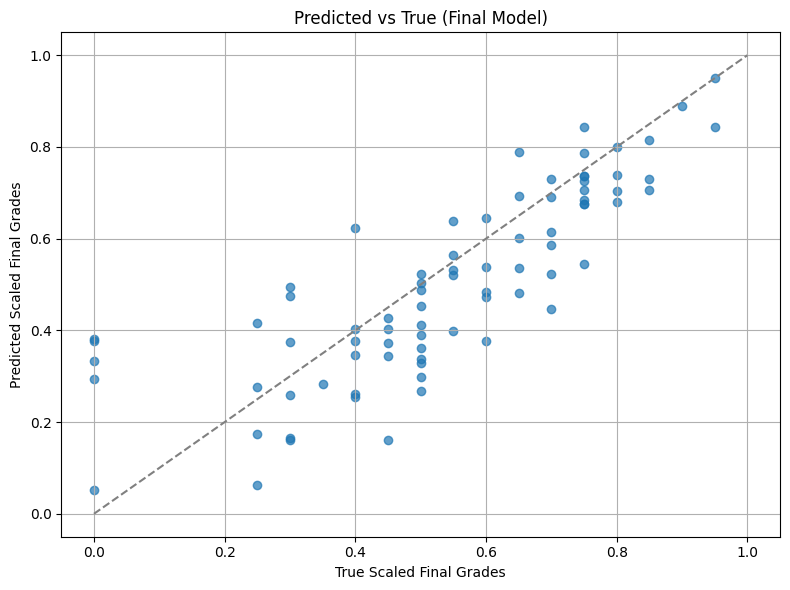

In [49]:
# Visualize predicted vs true final grades
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, final_pred, alpha=0.7)
plt.xlabel("True Scaled Final Grades")
plt.ylabel("Predicted Scaled Final Grades")
plt.title("Predicted vs True (Final Model)")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot visualizes the relationship between the predicted and actual (true) scaled final grades for the final model. A majority of the points align near the diagonal line, indicating that the model has learned the general pattern in the data. However, the spread of the points—especially in the middle range—suggests that the model tends to underestimate student performance in that region. While the model performs relatively well for high achievers, its predictions are less consistent for lower-scoring students. Overall, the model shows decent predictive capability, but there's room for refinement to reduce prediction errors and improve accuracy, particularly in the mid and low performance ranges.

### 8. Presentation and formatting

In this project, I set out to explore how students' demographic, academic, and behavioral data could help predict their final performance in mathematics. I started by cleaning the dataset and visualizing the distribution of final grades to get an initial sense of the data. Then, I used a correlation heatmap to identify which factors had the strongest relationships with final scores—midterm grades stood out as the most influential, along with parental education and study time.

To prepare for modeling, I consolidated features (like combining parental education into a single variable), handled categorical variables with encoding, and scaled everything using MinMaxScaler. I tried both linear and ridge regression models, and after comparing MSE and R² scores, I chose Ridge Regression as my final model due to its slightly better performance.

The predicted vs. actual scatter plot showed that while the model captures the general trend, it tends to be less accurate for students in the middle and lower performance range. That made me think about what's missing—maybe non-academic or psychological factors, which weren't included in the dataset, play a big role and could be worth exploring in future studies. I'd also like to try more advanced models like random forests or gradient boosting to see if they capture the complexity better.

Overall, this project allowed me to practice the full data science workflow, from formulating the question and preparing the data to building models and interpreting results while also highlighting areas where deeper exploration and refinement could lead to more robust predictions.

I release my GitHub: https://github.com/Xintong1122/STATS202HW to construct the open code community